In [7]:
import pandas as pd
import scipy.io
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import svm, datasets
from sklearn.svm import SVC

path = 'C:\\Users\\91726\\Desktop\\fisheriris_matlab.mat'
# fisheriris_matlab.mat
mat = scipy.io.loadmat(path)
mat



{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug 29 09:38:40 2022',
 '__version__': '1.0',
 '__globals__': [],
 'meas': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2,

In [8]:
data = mat['meas']
labels = mat['species']
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [9]:
labels_set = []

In [10]:
for i in range(0,len(labels)):
    if labels[i][0][0] == 'setosa':
        labels_set.append(0)
    elif labels[i][0][0] == 'versicolor':
        labels_set.append(1)
    elif labels[i][0][0] == 'virginica':
        labels_set.append(2)

In [11]:
labels_set = np.array(labels_set)

In [12]:
train_data = data[:120]
train_labels = labels_set[:120]
test_data = data[120:]
test_labels = labels_set[120:]

In [13]:
# No Hyperparameters in Linear
svc_linear = SVC(kernel='linear').fit(train_data,train_labels)
test_predict = svc_linear.predict(test_data)
Acc = 0
for i in range(0,len(test_labels)):
    if test_labels[i] == test_predict[i]:
        Acc = Acc + 1
(Acc/len(test_labels))*100

96.66666666666667

In [14]:
gamma = np.linspace(0.1,1,4)
C = np.linspace(0.25,1,4)
C,gamma

(array([0.25, 0.5 , 0.75, 1.  ]), array([0.1, 0.4, 0.7, 1. ]))

In [15]:
# c and gamma are the hyperparameters
gamma_list = []
C_list = []
Acc_list = []
for i in gamma:
    for c in C:
        C_list.append(c)
        gamma_list.append(i)
        svc_rbf = svm.SVC(kernel='rbf', gamma=i, C=c).fit(train_data, train_labels)
        test_predict_rbf = svc_rbf.predict(test_data)
        Acc_rbf = 0
        for j in range(0,len(test_labels)):
            if test_labels[j] == test_predict_rbf[j]:
                Acc_rbf = Acc_rbf + 1
        Acc_list.append((Acc_rbf/len(test_labels))*100)

In [16]:
dict_val1 = {}
dict_val1['gamma'] = gamma_list
dict_val1['C'] = C_list
dict_val1['Accuracy'] = Acc_list

In [17]:
# dict_val1

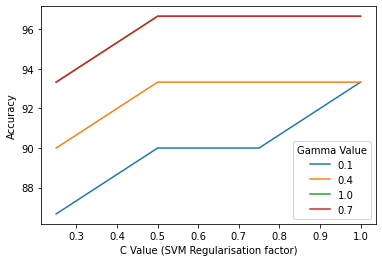

In [18]:
df1 = pd.DataFrame(dict_val1)

gamma = set(df1['gamma'])

plt.figure()
for g in gamma:
    selected_data1 = df1.loc[df1['gamma'] == g]
    plt.xlabel('C Value (SVM Regularisation factor)')
    plt.ylabel('Accuracy')
    plt.plot(selected_data1['C'], selected_data1['Accuracy'], label=g)
     
plt.legend(title = "Gamma Value")
plt.show()

In [19]:
deg = np.linspace(1,7,4)

In [20]:
# i and c are hyperparameters
degree_list = []
C_list = []
Acc_list = []
for j in deg:
    for c in C:
        C_list.append(c)
        degree_list.append(j)
        svc_poly = svm.SVC(kernel='poly', degree=int(j), C=c).fit(train_data, train_labels)
        test_predict_poly = svc_poly.predict(test_data)
        Acc_poly = 0
        for i in range(0,len(test_labels)):
            if test_labels[i] == test_predict_poly[i]:
                Acc_poly = Acc_poly + 1
        Acc_list.append((Acc_poly/len(test_labels))*100)

In [21]:
dict_val = {}
dict_val['degree'] = degree_list
dict_val['C'] = C_list
dict_val['Accuracy'] = Acc_list

In [22]:
# dict_val

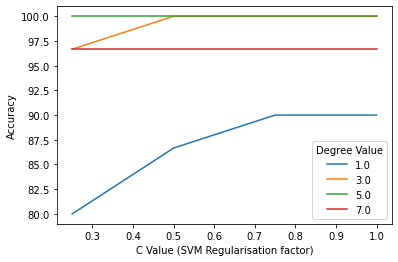

In [23]:
df = pd.DataFrame(dict_val)

degre = set(df['degree'])

plt.figure()
for deg in degre:
    selected_data1 = df.loc[df['degree'] == deg]
#     print(selected_data)
    plt.xlabel('C Value (SVM Regularisation factor)')
    plt.ylabel('Accuracy')
    plt.plot(selected_data1['C'], selected_data1['Accuracy'], label=deg)
     
plt.legend(title = "Degree Value")
plt.show()

In [24]:
train_pred_linear = svc_linear.predict(train_data)
test_pred_linear = svc_linear.predict(test_data)

(0.9620253164556962, 1.0)

In [67]:
TP1,TP2

(1.0, 1.0)

In [43]:
len(train_labels)

120